# 32-feature-engineering-validation

In [ ]:
# importing needed packages
import pandas as pd

In [ ]:
# saving the biggest data set from 2015 to Oct 2018 to review features that we created
validation_data = pd.read_csv('fe_data/2015_18_10.csv')

In [ ]:
# take a look at the data
validation_data

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,region,tire_purchase_freq
0,251635131.0,8,487.75,1,7,0,1301,198,911.0,911.0,1,NaN,168,0.000769
1,251636073.0,19,2656.93,4,15,0,1242,3,337.0,337.0,3,NaN,274,0.003221
2,251636235.0,1,0.00,0,1,0,1239,1239,-1.0,-1.0,1,NaN,244,0.000000
3,251636752.0,11,1678.38,1,10,0,1068,65,1068.0,1068.0,2,NaN,168,0.000936
4,251638270.0,11,678.87,3,8,0,1233,895,1119.0,907.0,3,NaN,42,0.002433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82954,654009201.0,6,1252.52,1,5,0,1308,225,225.0,225.0,1,NaN,212,0.000765
82955,654197901.0,9,478.84,2,7,0,1298,147,701.0,316.0,1,NaN,230,0.001541
82956,654387841.0,3,27.22,1,2,0,1059,760,760.0,760.0,1,NaN,255,0.000944
82957,654580123.0,15,1294.46,2,13,0,1238,118,601.0,448.0,2,NaN,194,0.001616


#### looking at total_transaction

In [ ]:
# 17K out of 83K people only did 1 transaction
# there are 19 people that had a unique number of transactions
print(validation_data['total_transaction'].value_counts().head(20))
print(validation_data['total_transaction'].value_counts().tail(20))

1     17315
2     15339
3      8329
4      7369
5      5235
6      4438
7      3478
8      2902
9      2428
10     2173
11     1697
12     1536
13     1263
14     1105
15      931
16      865
17      727
18      645
19      585
20      487
Name: total_transaction, dtype: int64
88     2
90     1
126    1
87     1
190    1
122    1
86     1
85     1
79     1
129    1
117    1
105    1
103    1
178    1
112    1
80     1
128    1
76     1
106    1
102    1
Name: total_transaction, dtype: int64


In [ ]:
# max number of total transactions was 190
# min number was 1
# confirmed no negative values
# not having 0 makes sense because then they would not be in the database
print(validation_data['total_transaction'].max())
print(validation_data['total_transaction'].min())

190
1


In [ ]:
# would hope our model would flag someone like him
# think he might also be highly ranked in sales total
validation_data[(validation_data['total_transaction'] == 190)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
5161,256487427.0,190,13068.35,42,147,1,1309,10,1309.0,70.0,94,2011.0,5126,0.032086


#### looking at tire_purchases

In [ ]:
# 38K people did not buy tires
# otherwise, most people only bought tires a few times
print(validation_data['tire_purchases'].value_counts().head(20))
print(validation_data['tire_purchases'].value_counts().tail(20))

In [ ]:
# largest number a person bought tires was 52
# no negative numbers
print(validation_data['tire_purchases'].max())
print(validation_data['tire_purchases'].min())

52
0


In [ ]:
# look at a constant tire buyer
validation_data[(validation_data['tire_purchases'] == 52)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
42235,291628093.0,119,9240.26,52,66,1,1310,5,1310.0,6.0,9,NaN,14443,0.039695


#### looking at services_purchases

In [ ]:
# the majority of customers had 1 service transaction
print(validation_data['service_purchases'].value_counts().head(20))
print(validation_data['service_purchases'].value_counts().tail(20))

1     25511
2     13639
3      8854
4      6486
5      4826
6      3760
7      3101
8      2558
9      2032
10     1629
11     1434
12     1188
13      991
14      890
15      722
16      654
17      584
18      495
19      444
20      313
Name: service_purchases, dtype: int64
93     2
147    2
72     2
121    1
90     1
103    1
100    1
99     1
97     1
94     1
91     1
89     1
84     1
82     1
77     1
76     1
75     1
71     1
69     1
63     1
Name: service_purchases, dtype: int64


In [ ]:
# values in range of the max and min total transactions
# no negative values
print(validation_data['service_purchases'].max())
print(validation_data['service_purchases'].min())

147
0


#### looking at other_purchases

In [ ]:
# only a few values for other purchases
# max is 32 and min is 0
print(validation_data['other_purchases'].value_counts().head(20))
print(validation_data['other_purchases'].value_counts().tail(20))

0     79538
1      2861
2       326
3       102
4        47
5        28
6        19
8         9
11        7
7         6
9         4
10        3
12        2
14        2
16        2
17        1
19        1
32        1
Name: other_purchases, dtype: int64
0     79538
1      2861
2       326
3       102
4        47
5        28
6        19
8         9
11        7
7         6
9         4
10        3
12        2
14        2
16        2
17        1
19        1
32        1
Name: other_purchases, dtype: int64


#### looking at sales_total

array([[<AxesSubplot:title={'center':'sales_total'}>]], dtype=object)

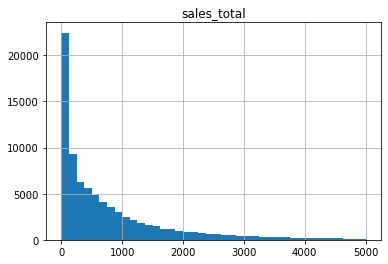

In [ ]:
# histogram for the sales column
# see that most people are spending less than 1000
# very few people are spending over 5000
validation_data.hist(column='sales_total', bins=40, range=(0, 5000))

In [ ]:
# these are something to think about
# 345 people have negative sales values
validation_data[(validation_data['sales_total'] < 0)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
193,251795482.0,3,-8.02,0,3,0,798,121,-1.0,-1.0,2,NaN,784285,0.0
379,251959867.0,1,-5.63,0,1,0,1266,1266,-1.0,-1.0,1,NaN,5061,0.0
1867,253386449.0,1,-3.02,0,1,0,1236,1236,-1.0,-1.0,1,NaN,533521,0.0
2120,253636667.0,1,-2.95,0,1,0,1219,1219,-1.0,-1.0,1,NaN,227603,0.0
2169,253664977.0,1,-6.16,0,1,0,1205,1205,-1.0,-1.0,1,NaN,290689,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81860,555471302.0,1,-0.13,0,1,0,26,26,-1.0,-1.0,1,NaN,12106,0.0
81933,555835465.0,3,-12.84,0,3,0,22,8,-1.0,-1.0,2,NaN,5967,0.0
81970,555985098.0,1,-0.04,0,1,0,19,19,-1.0,-1.0,1,NaN,442607,0.0
82282,561027519.0,1,-1.69,0,1,0,1,1,-1.0,-1.0,1,NaN,793851,0.0


In [ ]:
# investigate 
# dont think these make sense
mega_table[(mega_table['indiv_id'] == 251795482.0)]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,month_year
28869,28870,784285,990103960,2018-07-03,7003186,251795482.0,967917425,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28870,28871,784285,990103870,2018-07-02,7046930,251795482.0,967917425,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28871,28872,784285,990103960,2018-07-03,7047627,251795482.0,967917425,0.0,-247.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28872,28873,784285,990103870,2018-07-02,7022373,251795482.0,967917425,0.0,98.99,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28873,28874,784285,990103960,2018-07-03,7005505,251795482.0,967917425,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28874,28875,784285,990103870,2018-07-02,7003189,251795482.0,967917425,1.0,70.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28875,28876,784285,990103870,2018-07-02,7003348,251795482.0,967917425,0.0,60.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
28876,28877,784285,990103870,2018-07-02,7010962,251795482.0,967917425,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2018-07
1650860,1650861,13102,991903300,2016-08-25,7004302,251795482.0,950801158,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-08
1650861,1650862,13102,991903300,2016-08-25,7001119,251795482.0,950801158,0.0,0.00,4.0,...,32644,Y,R,N,NaN,NaN,NaN,NaN,NaN,2016-08


In [ ]:
# people are getting refunded for more than they paid
mega_table[(mega_table['indiv_id'] == 251959867.0)]

,unnamed_0_x,store_id,tran_id,date,article_id,indiv_id,vehicle_id,units,sales,prod_group_code,...,unnamed_0_y,email_optin_ind,ah1_res_bus_indc,supp1_bus_pander,unnamed_0,make,model,sub_model,model_year,month_year
448330,448331,5061,991042380,2015-05-15,7001718,251959867.0,913517968,0.0,-5.63,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448331,448332,5061,991042380,2015-05-15,7001122,251959867.0,913517968,0.0,0.00,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448332,448333,5061,991042380,2015-05-15,7046930,251959867.0,913517968,0.0,0.00,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448333,448334,5061,991042380,2015-05-15,7087890,251959867.0,913517968,0.0,-125.98,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448334,448335,5061,991042380,2015-05-15,7041556,251959867.0,913517968,0.0,0.00,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448335,448336,5061,991042380,2015-05-15,7008824,251959867.0,913517968,1.0,0.00,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05
448336,448337,5061,991042380,2015-05-15,7020435,251959867.0,913517968,2.0,125.98,4.0,...,65247,Y,R,N,NaN,NaN,NaN,NaN,NaN,2015-05


#### looking at vehicle_count

In [ ]:
# most people only own 1 or 2 cars
print(validation_data['vehicle_count'].value_counts().head(20))
print(validation_data['vehicle_count'].value_counts().tail(20))

1     48658
2     19356
3      8164
4      3529
5      1597
6       794
7       384
8       203
9        90
10       61
11       38
14       18
12       16
13       11
17        7
19        6
18        4
16        4
15        4
20        2
Name: vehicle_count, dtype: int64
12    16
13    11
17     7
19     6
18     4
16     4
15     4
20     2
28     2
79     1
21     1
22     1
24     1
25     1
26     1
94     1
33     1
35     1
36     1
42     1
Name: vehicle_count, dtype: int64


In [ ]:
# no zeroes or negatives
print(validation_data['vehicle_count'].max())
print(validation_data['vehicle_count'].min())

94
1


In [ ]:
# guy who has 94 cars has the highest transactions
validation_data[(validation_data['vehicle_count'] == 94)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
5161,256487427.0,190,13068.35,42,147,1,1309,10,1309.0,70.0,94,2011.0,5126,0.032086


<AxesSubplot:xlabel='vehicle_count'>

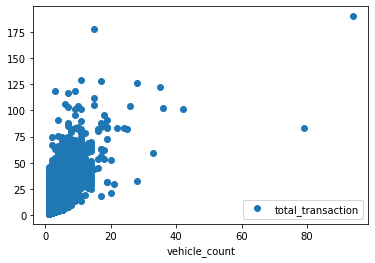

In [ ]:
# can see from the chart that man is an outlier
# the only other person that has more than 60 cars does not have nearly as many transactions
# but there is someone that has close to that number of transactions that only has a few cars
validation_data.plot(x='vehicle_count', y='total_transaction', style='o')

#### looking at model_year

In [ ]:
# model year feature the one with very little data - only 521 entries
validation_data[(validation_data['model_year_avg'] > 0)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
328,251892059.0,9,1760.74,2,7,0,1283,36,701.0,39.0,3,2004.000000,353858,0.001559
403,251974300.0,12,1650.58,2,10,0,1223,54,1214.0,1207.0,3,2007.000000,6882,0.001635
470,252025076.0,8,1440.72,4,4,0,1278,47,1278.0,47.0,3,2013.000000,646067,0.003130
637,252178816.0,25,1265.25,5,16,4,1262,94,1262.0,94.0,4,2000.000000,533416,0.003962
839,252387414.0,14,2831.58,4,10,0,1061,417,1061.0,614.0,5,2003.000000,5460,0.003770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82678,605772273.0,32,3926.14,7,25,0,1258,3,1001.0,72.0,9,2013.000000,317132,0.005564
82722,610223763.0,11,1499.96,4,7,0,867,41,867.0,177.0,1,2014.000000,336252,0.004614
82783,614600916.0,15,2196.57,4,11,0,1248,23,1140.0,358.0,5,2004.571429,6599,0.003205
82792,615125533.0,35,6485.02,3,32,0,1247,73,937.0,523.0,6,2015.000000,679712,0.002406


array([[<AxesSubplot:title={'center':'model_year_avg'}>]], dtype=object)

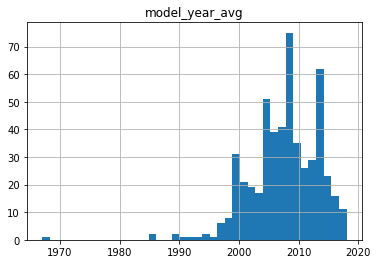

In [ ]:
# histogram is within the expected values
validation_data.hist(column='model_year_avg', bins=40)

#### looking at store

In [ ]:
# large variety in the stores
# only 181 transactions are at the same store
print(validation_data['region'].value_counts().head(20))
print(validation_data['region'].value_counts().tail(20))

0      12735
17      2281
59      2251
49      2031
109     1560
143     1261
282     1163
226     1159
225     1152
106     1055
255     1051
274     1045
166     1035
154      936
47       922
220      916
265      912
211      907
83       878
216      872
Name: region, dtype: int64
164    25
176    25
258    25
183    24
156    23
207    23
229    22
8      22
276    21
6      21
227    19
266    19
234    18
301    17
267    16
97     15
215    14
14     10
43      9
205     9
Name: region, dtype: int64


In [ ]:
# no zeroes or negatives for store value
print(validation_data['region'].max())
print(validation_data['region'].min())

310
0


array([[<AxesSubplot:title={'center':'region'}>]], dtype=object)

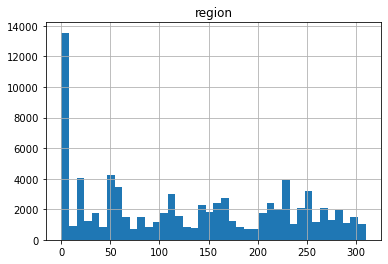

In [ ]:
# histogram is within the expected values
# 0 is a placeholder value for region of comma
validation_data.hist(column='region', bins=40)

#### looking at tire_purchase_freq

In [ ]:
# 1.0 seems very odd 
print(validation_data['tire_purchase_freq'].max())
print(validation_data['tire_purchase_freq'].min())

1.0
0.0


In [ ]:
# donot know if we should remove these people
# they just bought tires so it looks like they have a really high freq
validation_data[(validation_data['tire_purchase_freq'] > 0.2)]

,indiv_id,total_transaction,sales_total,tire_purchases,service_purchases,other_purchases,days_since_first_transaction,days_since_last_transaction,days_since_first_tire_purchase,days_since_last_tire_purchase,vehicle_count,model_year_avg,store,tire_purchase_freq
8694,259728268.0,2,502.98,1,1,0,1,1,1.0,1.0,1,NaN,21709,1.000000
34805,284712754.0,2,206.96,1,1,0,3,3,3.0,3.0,1,NaN,6009,0.333333
70185,437578297.0,2,1166.40,1,1,0,4,4,4.0,4.0,1,NaN,326687,0.250000
82155,559832440.0,3,321.88,2,1,0,7,7,7.0,7.0,2,NaN,784290,0.285714
82181,560586085.0,2,688.79,1,1,0,4,4,4.0,4.0,1,NaN,17434,0.250000
82217,560697247.0,2,737.50,1,1,0,4,4,4.0,4.0,1,NaN,348713,0.250000
82225,560754048.0,2,150.32,1,1,0,4,4,4.0,4.0,1,NaN,46485,0.250000
82226,560754237.0,2,1092.18,1,1,0,4,4,4.0,4.0,1,NaN,23884,0.250000
82228,560755133.0,2,180.58,1,1,0,4,4,4.0,4.0,1,NaN,19739,0.250000
82230,560756005.0,2,274.91,1,1,0,4,4,4.0,4.0,1,NaN,29467,0.250000


array([[<AxesSubplot:title={'center':'tire_purchase_freq'}>]],
      dtype=object)

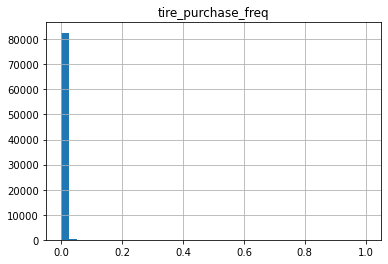

In [ ]:
validation_data.hist(column='tire_purchase_freq', bins=40)

#### looking at monthly variables

In [ ]:
data = [['January', validation_data['jan'].sum()], ['February', validation_data['feb'].sum()], ['March', validation_data['mar'].sum()], ['April', validation_data['apr'].sum()], ['May', validation_data['may'].sum()], ['June', validation_data['jun'].sum()], ['July', validation_data['jul'].sum()], ['August', validation_data['aug'].sum()], ['September', validation_data['sep'].sum()], ['October', validation_data['oct'].sum()], ['November', validation_data['nov'].sum()], ['December', validation_data['dec'].sum()]]
month_plot = pd.DataFrame(data, columns = ['Month', 'Count of Total Tire Purchases'])

month_plot

month_plot.plot.bar(x='Month', y='Count of Total Tire Purchases', ylim=(0,9000))


Ideas for new features
1. How many months out of the time period did the person buy tires (is this captured in the frequency variable)?
2. I dont know if the model will already do this but percent tire sales / total sales?
3. Is this already done - tires divided by number of cars?